In [2]:
import gurobipy as gp
import numpy as np
import matplotlib.pyplot as plt


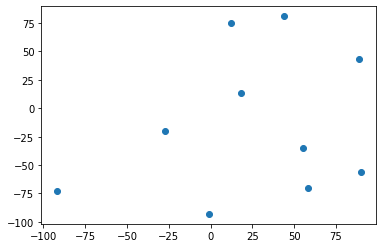

In [3]:
np.random.seed(5)
n = 10
N = range(n)
xcoord = np.random.randint(-100,100, n)
ycoord = np.random.randint(-100,100, n)
plt.scatter(xcoord,ycoord)

dist = lambda n1, n2: np.sqrt((xcoord[n1] - xcoord[n2])**2 + (ycoord[n1] - ycoord[n2])**2)
arcos = {(i,j):dist(i,j) for i in N for j in N if i != j}
c = arcos

Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (linux64)
Optimize a model with 20 rows, 90 columns and 180 nonzeros
Model fingerprint: 0x0d48303c
Variable types: 0 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
[(0, 3), (1, 8), (2, 7), (3, 1), (4, 2), (5, 9), (6, 0), (7, 5), (8, 4), (9, 6)]


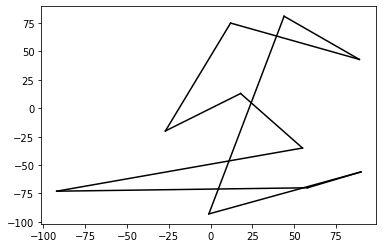

Defina el subtour 


Found heuristic solution: objective 976.1349362
Presolve time: 0.00s
Presolved: 20 rows, 90 columns, 180 nonzeros
Variable types: 0 continuous, 90 integer (90 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.000000e+01   0.000000e+00      6s
      19    5.8366423e+02   0.000000e+00   0.000000e+00      6s

Root relaxation: objective 5.836642e+02, 19 iterations, 0.01 seconds
[(0, 5), (1, 8), (2, 4), (3, 1), (4, 2), (5, 0), (6, 9), (7, 6), (8, 3), (9, 7)]


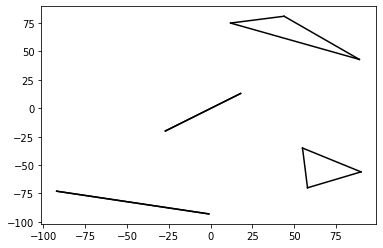

Defina el subtour 5,0


[(0, 4), (1, 2), (2, 1), (3, 8), (4, 5), (5, 0), (6, 9), (7, 6), (8, 3), (9, 7)]


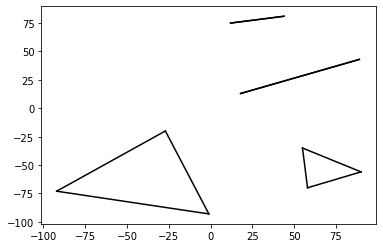

Defina el subtour 0,4,5



    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  589.47781    0   16  976.13494  589.47781  39.6%     -   24s
[(0, 9), (1, 2), (2, 1), (3, 8), (4, 5), (5, 0), (6, 7), (7, 6), (8, 3), (9, 4)]


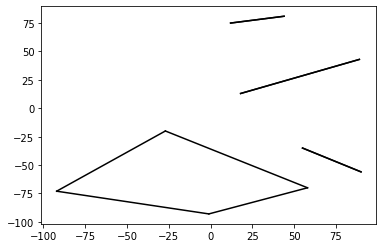

Defina el subtour 0,9,4,5


[(0, 9), (1, 2), (2, 1), (3, 8), (4, 5), (5, 0), (6, 7), (7, 4), (8, 3), (9, 6)]


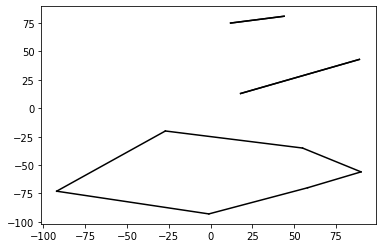

Defina el subtour 0,9,4,5,6,7


[(0, 9), (1, 2), (2, 1), (3, 8), (4, 5), (5, 0), (6, 7), (7, 3), (8, 4), (9, 6)]


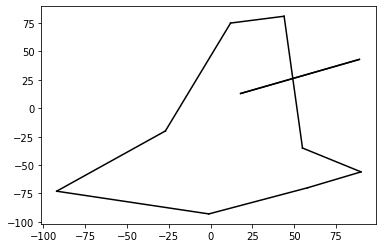

Defina el subtour 0,9,6,7,3,8,4,5


[(0, 5), (1, 7), (2, 1), (3, 8), (4, 2), (5, 4), (6, 9), (7, 6), (8, 3), (9, 0)]


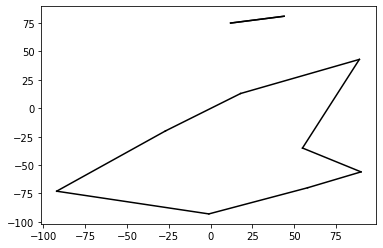

Defina el subtour 0,5,4,2,1,7,6,9


[(0, 5), (1, 8), (2, 7), (3, 1), (4, 2), (5, 4), (6, 9), (7, 6), (8, 3), (9, 0)]


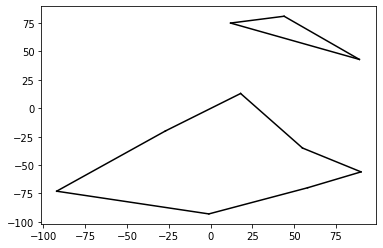

Defina el subtour 0,5,4,2,7,6,9


[(0, 5), (1, 7), (2, 8), (3, 1), (4, 2), (5, 4), (6, 9), (7, 6), (8, 3), (9, 0)]


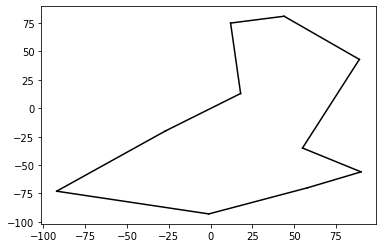

Defina el subtour 


*    0     0               0     610.7474718  610.74747  0.00%     -  207s

Cutting planes:
  Gomory: 1
  Lazy constraints: 7

Explored 1 nodes (26 simplex iterations) in 207.59 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 610.747 976.135 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.107474717594e+02, best bound 6.107474717594e+02, gap 0.0000%

User-callback calls 75, time in user-callback 207.52 sec
--------------------------------------------------------------------------------
Solution:
 [(0, 5), (1, 7), (2, 8), (3, 1), (4, 2), (5, 4), (6, 9), (7, 6), (8, 3), (9, 0)]


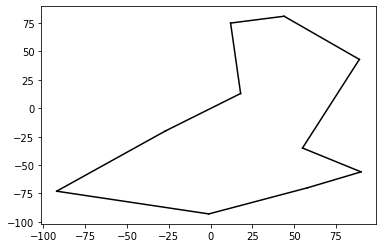

In [8]:
def get_subtours():
    inp = input("Defina el subtour")
    if inp == '':
        return []
    sub = list(map(int, inp.split(',')))
    return sub

def graficar(arcs):
    for i,j in arcs:
        plt.plot([xcoord[i],xcoord[j]], [ycoord[i],ycoord[j]], color='black')
    plt.show()

def cb(model, where):
    if where == gp.GRB.Callback.MIPSOL:
        vals = model.cbGetSolution(x)
        arcos = [(i,j) for i,j in vals.keys() if vals[i,j] > 0.5]
        print(arcos)
        graficar(arcos)
        subtour = get_subtours()
        if len(subtour) > 1:
            model.cbLazy(gp.quicksum(x[i,j] for i in subtour for j in subtour if i != j) <= len(subtour) - 1)

m = gp.Model('TSP')

x = m.addVars(arcos.keys(), name = 'x', vtype = gp.GRB.BINARY)

m.setObjective(gp.quicksum(x[i,j]*c[i,j] for i,j in arcos.keys()))
m.addConstrs(gp.quicksum(x[i,j] for j in N if i != j) == 1 for i in N)
m.addConstrs(gp.quicksum(x[i,j] for i in N if i != j) == 1 for j in N)

m.Params.lazyConstraints = 1
m.optimize(cb)
m.write('model.lp')

vals = m.getAttr('x', x)
arcs = [(i,j) for i,j in vals.keys() if vals[i,j] > 0.5]
print('-'*80 + '\nSolution:\n',arcs)
dest = {i:j for i,j in arcs }
graficar(arcs)


        